In [1]:
%matplotlib inline

# Convex functions

1. Basic properties and examples
    1. First-order conditions
    3. Second-order conditions
    4. Examples
        - Norms
        - Cumulant Generating Function
        - Geometric mean
        - Log-det
2. Sublevel sets
3. Epigraph
4. Jensen's inequality
    1. Application: pricing kernel dispersion bounds
5. Operations preserving convexity
6. Hyperplanes, affine functions, and convex functions
7. The conjugate function
    1. Definition and examples
        - Convexity
    2. Visual intuition:
        - hyperplane under the Epigraph
        - intercept
    3. Examples
    4. Basic properties
        - Fenchel's inequality
        - Conjugate of the conjugate

# Definition of convexity

$f:R^n \to R$ is convex if and only if $\mathbf{\text{dom}} f$ is convex and if for all $x,y \in \mathbf{\text{dom}}$, and for $\theta \in [0,1]$
$$
    f(\theta x + (1- \theta)y) \leq \theta f(x)  + (1- \theta) f(y)
$$

- extended-value extensions: including infinity, preserves the above inequality, simplifies notation

# A univariate convex function

<img src="fig/convex-function.png">

# Convex with some domain qualifiers

### Consider $f(x)=1/x$

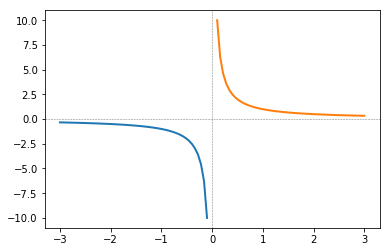

In [2]:
from matplotlib import pyplot as plt
import numpy as np

dom_a = np.linspace(-3,-1e-1,50)
dom_b = np.linspace(1e-1,3,50)

cv_fig, ax = plt.subplots(figsize=(6,4))
ax.plot(dom_a, 1.0/dom_a, lw=2)
ax.plot(dom_b, 1.0/dom_b, lw=2)
ax.axhline(c="grey",ls="--",lw=0.52)
ax.axvline(c="grey",ls="--",lw=0.52)

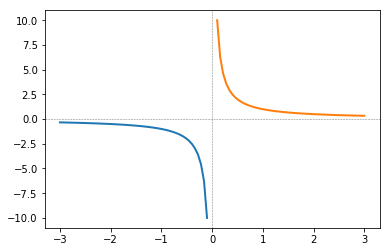

In [3]:
cv_fig

- the blue line is a *concave* function on $R_{-}$
- the orange line is a *convex* function on $R_+$
- $f(x) = 1/x$ is neither convex nor concave on $R$

# Checking convexity of differentiable functions

## First-order conditions

- Is $\mathbf{\text{dom}} f$ convex?
- If yes, $f$ is convex if and only if
$$
    f(y) \geq f(x) + \nabla f(x)^T(y-x)
$$

- First-order Taylor approximation
- global under-estimator
- **It is like you always have a supporting hyperplane**

# Checking convexity of twice differentiable functions

## Second-order conditions

- Is $\mathbf{\text{dom}} f$ convex?
- If yes, $f$ is convex if and only if
$$
    \nabla ^2 f(x) = \frac{\partial^2 f(x)}{\partial x \partial x^T} \succeq 0
$$

# Quadratic function

Let's plot a quadratic function:

$$
    f(x) = \frac{1}{2} x^T P x + q^T x + r
$$

$$
\nabla^2 f(x) = P
$$

We can modify $P$ in the next slide and see what happens. Eigenvalues of $P$ printed.

# Visualise a quadratic function in $R^2$

- You can change parameters $x$, $y$ and $z$ with the sliders
- They are inserted into the $P$ matrix as follows:

$$
    p=\begin{bmatrix}
        x & y \\ y & z
    \end{bmatrix}
$$

- above the plot, the eigenvalues of $P$ are printed
- play around and see what convex / non-convex quadratic functions look like

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


def quad_fun(x_vector, p_matrix):
    return x_vector.T * p_matrix * x_vector

def quad_wrap(x, y, p_matrix):
    return quad_fun(np.matrix([[x] , [y]]), p_matrix)

def quad_fun_plot(p_matrix):
    
    x = np.linspace(-2.0, 2.0, 50)
    y = x
    x_grid, y_grid = np.meshgrid(x,y)
    z_grid = np.zeros(x_grid.shape)
    z_grid = np.array([quad_wrap(x,y, p_matrix) for x,y in zip(np.ravel(x_grid), np.ravel(y_grid))])
    z_grid = z_grid.reshape(x_grid.shape)        
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, z_grid)
    print(np.linalg.eigvals(p_matrix))
    
def quad_plot_inter(x = 1.0, y = 1.0, z = 1.0):
    p_mat = np.matrix([[x, y] , [y, z]])
    quad_fun_plot(p_mat)

[2. 0.]


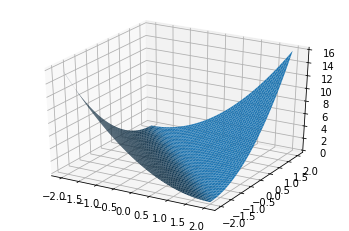

<function __main__.quad_plot_inter(x=1.0, y=1.0, z=1.0)>

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(quad_plot_inter, p_el = [1, 1, 0])

# Examples of convex functions

### The list is long
- see pp. 71-74 in Boyd and Vandeberghe
- More interesting examples here
    - *Entropic functions*: $- \log(x)$ and $x \log x$ are convex on $R_+$
    - *Log-sum-exp*: $\log{\sum_{i=1}^n e^{x_i}}$ is convex on $R^n$
    - *Geometric mean*: $\left(\prod_{i=1}^n x_i \right)^{1/2}$ is concave on $R^n_{++}$
    - *Log-determinant*: $\log{\det{X}}$ is concave on $X$ **positive definite**.
    - *Norms*: **all of them** through the triangle inequality

You can see Boyd and Vandeberghe for proofs of the more interesting cases.

# Sublevel sets

## Definition

The $\alpha$-sublevel set of a function is defined as
$$
    C_{\alpha} = \{ x \in \mathbf{\text{dom}} f | f(x) \leq \alpha \}
$$

## Properties:

- If $f$ is convex, so is $C_{\alpha}$
- However, if $C_{\alpha}$ is convex, $f$ is not necessarily convex
    - e.g. $f(x) = - e^x$ is concave with convex sublevel sets


# Visualisation of sublevel sets

- convex function
- non-convex function with non-convex sublevel set

### Let's sketch them for $\alpha=0$
$$
    C_{0} = \{ x \in \mathbf{\text{dom}} f | f(x) \leq 0 \}
$$

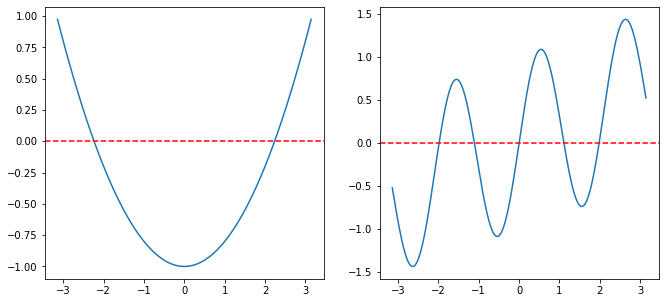

In [3]:
from scipy.optimize import root_scalar

def conv_foo(x_data):
    return 0.2 * x_data ** 2.0 - 1.0

def non_conv_foo(x_data):
    return np.sin(3* x_data) + 1.0 / 6.0 * x_data

plt.subplot(1, 2, 1)

func_domain = np.linspace(-np.pi, np.pi, 300)

plt.plot(func_domain, conv_foo(func_domain))
plt.axhline(y = 0.0, color = 'r', linestyle = '--')

plt.subplot(1, 2, 2)

plt.plot(func_domain, non_conv_foo(func_domain))
plt.axhline(y = 0.0, color = 'r', linestyle = '--')
fig_sub = plt.gcf()
fig_sub.set_size_inches(11, 5)

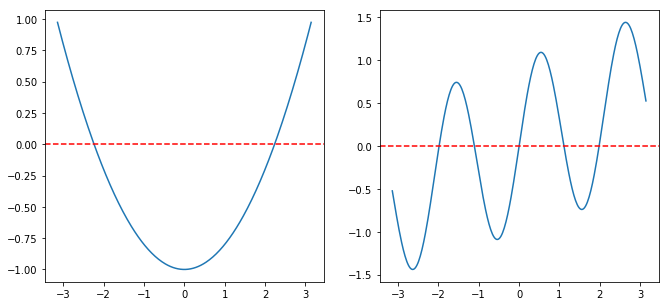

In [7]:
fig_sub

# Epigraph - the set of points above the graph

## Graph of a function: definition

For a function $f:R^n \to R$, it is a set in $R^{n+1}$
$$
    \{(x, f(x)) | x \in \mathbf{\text{dom}} f\}
$$

## Epigraph: definition

$$
    \mathbf{\text{epi}} f := \{(x, t) | x \in \mathbf{\text{dom}} f, \, f(x) \leq t\}
$$

# Convex functions and convex sets

### A function is convex if and only if its epigraph is convex.

<img src="fig/056_secants1.png" width="50%" height="50%">

# Jensen's inequality

## Generalise the convexity condition

Take $\theta \in R^n$, $\theta_i \geq 0$, $\sum_i \theta_i = 1$. Then
$$
    f(\theta^T x) \leq \sum_{i=1}^n \theta_i f(x_i)
$$

Furthermore, let's have a set $S \subset \mathbf{\text{dom}} f$ and a probability measure $p(x)$ s.t. $\int_S p(x) dx = 1$, then
$$
    f\left(\int_S x p(x) dx \right) \leq \int_S f(x) p(x) dx,
$$
which translates to
$$
    f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)]
$$
if all quantities are finite

# Asset pricing: SDF dispersion bounds

- [Orłowski Sali Trojani working paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3314269)
    - asset pricing equation
    - interpretation as CGF evaluation
    - statistical and no-arbitrage cgf
    - Jensen's inequality
    - what does this approach buy us?

# Asset-pricing equation:

- Take stock return $R$
- We call the random variable $M$ a *stochastic discount factor* if for any return $R$

$$
    \mathbb{E}[MR] = 1
$$

# Moment (cumulant) generating function

### Definition
- Take random variable $X$ taking values in $R^n$
- Take $u \in R^n$
$$
    \phi(u) = \mathbb{E}[e^{u'X}] \text{ -- moment generating function}
$$

$$
    \kappa(u) = \log(\phi(u)) \text{ -- cumulant generating function}
$$

### Fact: both are convex

# CGF in asset pricing

### Asset-pricing equation in terms of the CGF

$$
    \mathbb{E}[MR] = 1 \iff \kappa \left(\begin{bmatrix}1 &  1 \end{bmatrix} \right) = \log{\left(\mathbf{E}\left[ e^{\log{M} + \log{R}} \right]\right)} = 0
$$

### Convex function + Jensen's inequality = inference on $M$
- $M$ is, in general, **not observable**
- $R$ can be of arbitrary dimension
- Let's use the CGF of $(\log{M}, \log{R})$ tell us something about $M$!
    - we will use convexity: $\kappa(\theta u_1 + (1- \theta) u_2) \leq \theta \kappa(u_1) + (1-\theta)\kappa(u_2)$ for $\theta \in [0,1]$
    - but we **need to know something** about values of the CGF of $(\log{M}, \log{R})$
    - we know the pricing equation above!
    - we can estimate $\kappa \left(\begin{bmatrix}0 &  r \end{bmatrix} \right) = \log\mathbb{E}[R^r] $
    - we know $\kappa \left(\begin{bmatrix}1 &  0 \end{bmatrix} \right) $: it's the log-price of a bond, $\log B$

# Obsevable CGF values

### The observable set and its convex hull
<img src="fig/cgf-hull.png" width="70%" height="70%">

# CGF bound

- Evaluating the CGF at point $(1/2,\, 0)$ we have $\log\mathbb{E}\left[M^{0.5}\right]$
    - but we cannot measure it directly (as we cannot observe $M$)
- **(convexity)**: the line connecting MGF in points $(1,\,1)$ and $(0,\,-1)$ lies higher than $\log\mathbb{E}\left[M^{0.5}\right]$
    - and $(1/2,\,0)$ is in the middle of this line:
        - $(1/2,\,0) = 1/2 \times (1,\,1) + 1/2 \times (0,\,-1)$
- This means that

$$
    \log\mathbb{E}\left[M^{0.5} \right] \leq 0.5 \log\mathbb{E}\left[R^{-1} \right] + 0.5\log 1
$$
... i.e. we can say something about $M$ using only data on $R$

### The entropy of $M$ is related to the best investment opportunities available for investors!

### It's all a consequence of Jensen's inequality

### The approach generalises the whole literature about SDF entropy

# Operations preserving convexity

### How to determine convexity?
- check from definition (restrict domain, restrict to line)
- show positive definiteness of Hessian (second-order condition, requires differentialbility)
- show that your function is produced from convex function through:
    - taking non-negative weighted sums
    - composing with affine function
    - taking point-wise maxima / suprema
    - composition of convex functions
    - partial minimisation over convex domain subsets
    - perspective
    
Let's talk about some of them

### Weighted sum

- $f_1, \ldots, f_n$ and $a_1, \ldots, a_n \geq 0$ implies $a_1 f_1 + \ldots a_n f_n$ is convex

### Affine composition

- convex $f$ implies convex $f(Ax + b)$ 

### Point-wise max

- family of functions $f_s, \, s \in S$, convex for any $s$; then $f := \max_{s\ in S} f_s(x)$ is convex

### Composition of functions
- we're looking at $f = h \circ g = h(g(x))$
    - $h$ convex and non-decreasing + $g$ convex $\Longrightarrow$ $f$ convex 
    - $h$ convex and non-increasing + $g$ concave $\Longrightarrow$ $f$ convex
    - $h$ concave and non-decreasing + $g$ concave $\Longrightarrow$ $f$ concave
    - $h$ concave and non-increasing + $g$ convex $\Longrightarrow$ $f$ concave
- think about second order condition and $f''(x) = h''(g(x))g'(x)^2 + h'(g(x))g''(x)$

## Partial minimisation

- Take $g(x,y)$ convex in both variables, and a convex set $C$
    - $f(x) = min_{y\in C} g(x,y)$ is convex

# The conjugate function

## Conjugation is pivotal for understanding duality later on
## It is strongly related to the supporting hyperplane theorem

## Definition
- Let $f: R^n \to R$. We define the *conjugate function* $f^* : R^n \to R$ as

$$
    f^*(y) = \sup_{x \in \mathbf{\text{dom}}f} \left( y^T x - f(x) \right)
$$

- The domain of $f^*$ is the set $y \in R^n$ such that the above is finite, i.e. $y^T x - f(x)$ has an upper bound

### Key property:
- $f^*$ is **convex** (even if $f$ is not!):
    - for a given $x$, $y^T x - f(x)$ is an **affine** (thus convex) function of $y$
    - we take a supremum of a family of convex functions

# The conjugate function

### A description of the convex hull of the epigraph of $f$

<img src="fig/conjugate_function_2.png">

# Some simple conjugates

### Affine function
- $f(x) = ax + b$
    - $f^*(y) = \sup_x xy - ax - b$
    - bounded only if $y = a$ (linear parts cancel out)
    - $\mathbf{\text{dom}} f^* = \{a\},\, f^*(a) = b$
    
### Negative $log$
- $f(x) = - log(x)$, $\mathbf{\text{dom}} f = R_{++}$

    - $f^*(y)=\sup_x xy+\log{x}$
        
        - unbounded above if $y \geq 0$
        - has maximum at $x = -1/y$ if $y < 0$
    - $\mathbf{\text{dom}} f^* = -R_{++}$,  $f^*(y) = -log{-y} - 1$
    - solution: calculate the first derivative of  $xy + \log{x}$ w.r.t. $x$ and set it to $0$

# More conjugates

### Convex quadratic
- $f(x) = \frac{1}{2} x^T Q x$ and Q positive definite
    - $y^T x - x^T Q x$ bounded above as function of $x$ for all $y$
    - maximised at $Q^{-1}y$
    - $f^*(y) = \frac{1}{2} y^T Q^{-1} y$ for with $\mathbf{\text{dom}} f^* = R^n$

# More conjugates

### Useful definition: indicator function of a set
- For a set $S$, 
$$
I_S(x) = \left\{ \begin{matrix} 0 & x\in S \\ \infty & \text{otherwise} \end{matrix} \right.
$$

$$
I_S^*(y) = \sup_x y^T x - I_S(x) = \sup_{x \in S} y^T x \text{ is the support function of set } S
$$

### Norm
- Let $||\cdot||$ be a norm on $R^n$, let's take $f(x) = ||x||$
    - The dual norm is $||y||_{*} = \sup_{||x|| \leq 1}\{ y^T x \}$
    - The conjugate of the norm is
        - $f^*(y) = \left\{ \begin{matrix} 0 & ||y||_{*} \leq 1 \\ \infty & \text{otherwise} \end{matrix} \right. $
        - This is the indicator of the unit ball in the dual norm.

# Properties of the conjugate function

## Fenchel's inequality

- The definition tells us $f^*(y) = \sup_x y^T x - f(x) \geq y^T x - f(x)$
    - so we have $f(x) + f^*(y) \leq y^T x$

## Conjugate of the Conjugate

- $f^{**}(x) = \sup_y x^T y - f^*(y) = \sup_y x^T y - (\sup_z \{ y^T z - f(z) \})$
- What is $f^{**}$?
    - if $f$ is convex and $\mathbf{\text{epi}} f$ is closed, $f^{**} = f$
    - otherwise, $f^{**}$ is some convex function, different from $f$

## You can check in Boyd and Vandenberghe: 
#### Conjguation of differentiable functions
#### Scaling and affine transformations